# Digging Beneath the Surface

*Benjamin Johnson*


*June 20, 2022*

[Home](https://fastdatascientist.github.io/Digging-Beneath-the-Surface/)

[About Me](https://fastdatascientist.github.io/Digging-Beneath-the-Surface/author.html)

[Previous Posts](https://fastdatascientist.github.io/Digging-Beneath-the-Surface/posts.html)

## US National Park Optimal Route

It's summertime, which means family vacations! The in-laws are coming to visit for 4th of July, so I thought I'd work on a problem for them. My mother-in-law has a goal of visiting every US National Park. That got me thinking - how many parks are there, and what would be the optimal path if we wanted to stop by each one on a single trip? Gas isn't cheap these days ($5.21 / gal at Kroger today), so let's find an optimal path! 

### Import Statements and file read-in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Benjamin\Digging Beneath the Surface\data\US National Parks.csv", encoding="utf-8")
print("There are " + str(df.shape[0]) + " US National Parks")

There are 63 US National Parks


In [36]:
df.head()

,Name,Latitude,Longitude,Area,Recreation visitors,Description
0,Acadia,44.35,-68.21,"49,071.40 acres (198.6 km2)","4,069,098",Covering most of Mount Desert Island and other...
1,American Samoa,-14.25,-170.68,"8,256.67 acres (33.4 km2)","8,495",The southernmost national park is on three Sam...
2,Arches,38.68,-109.57,"76,678.98 acres (310.3 km2)","1,806,865","This site features more than 2,000 natural san..."
3,Badlands,43.75,-102.50,"242,755.94 acres (982.4 km2)","1,224,226","The Badlands are a collection of buttes, pinna..."
4,Big Bend,29.25,-103.25,"801,163.21 acres (3,242.2 km2)","581,220",Named for the prominent bend in the Rio Grande...


In [37]:
# Create a list of US National Parks
parks = []
for index, row in df.iterrows():
    parks.append(row['Name'].replace(u'\xa0', u''))

Our input file contains 63 rows (one per park), consistenting of latitude and longitude.

This route problem actually has a common name - the Traveling Salesperson problem. Given a list of locations and distances between each pair, our goal is to find the shortest possible route that visits each site exactly once and then returns to the origin. Python actually has a special library for this type of problem, so we'll test out how it works.

### Import TSP library and test with sample data 

In [5]:
from python_tsp.heuristics import solve_tsp_simulated_annealing

I created 4 sample locations and randomly generated distances between them.

In [6]:
distances = np.array([
    [0, 5, 3,  6], # Location 0
    [6, 0, 1,  2], # Location 1
    [1, 2, 0,  4], # Location 2
    [7, 2, 10, 0]  # Location 3
])

Let's use a function to determine the optimal path and total distance.

In [7]:
permutation, distance = solve_tsp_simulated_annealing(distances)

In [8]:
print(permutation)

[0, 3, 1, 2]


In [9]:
print(distance)

10


The optimal path for our sample data is Location 0 -> 3 -> 1 -> 2 -> 0, resulting in a total trip of 10 miles.

Now that we've tested this out, let's apply this logic to our park problem. But first, we need to calculate the distances between parks.

In [15]:
import numpy as np
from python_tsp.distances import great_circle_distance_matrix

df2 = df[['Latitude','Longitude']]
convert_m_to_mi = 1609.34

distances = great_circle_distance_matrix(df2) / convert_m_to_mi
print(distances)

[[   0.         7515.11839837 2151.84963114 ... 2061.2473651
  2664.29848316 2363.88355911]
 [7515.11839837    0.         5373.90862905 ... 5540.76510007
  4891.58628683 5162.34662542]
 [2151.84963114 5373.90862905    0.         ...  411.83432884
   541.68764883  212.11400352]
 ...
 [2061.2473651  5540.76510007  411.83432884 ...    0.
   660.74153156  521.5653882 ]
 [2664.29848316 4891.58628683  541.68764883 ...  660.74153156
     0.          355.07283509]
 [2363.88355911 5162.34662542  212.11400352 ...  521.5653882
   355.07283509    0.        ]]


Our TSP package has an extremely useful function to calculate distances between two coordinates using the [Haversine Formula](https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/). We're making a couple assumptions with this method, however:

- The Haversine Formula finds the distance between two points on a sphere. The Earth is not a perfect sphere, so these numbers are approximate.
- We're also not accounting for the actual travel distance by plane, train or automobile. I was too lazy to look up the actual distances in Google Maps (1,953 unique searches). Maybe one day I'll revisit this problem by pulling this data systematically through an application programming interface (API).

Next, let's feed our distances into our TSP solver.

In [38]:
permutation, distance = solve_tsp_simulated_annealing(distances)

In [39]:
### Find the permutation names rather than just the row index
permutation2 = []
for i in permutation:
    permutation2.append(df.iloc[i][0].replace(u'\xa0', u''))

### Show optimal path

In [70]:
print("The optimal path is:")
for index, value in enumerate(permutation2):
    print("Park number " + str(index) + ":     " + value)

The optimal path is:
Park number 0:     Acadia
Park number 1:     Shenandoah
Park number 2:     New River Gorge
Park number 3:     Cuyahoga Valley
Park number 4:     Isle Royale
Park number 5:     Voyageurs
Park number 6:     Theodore Roosevelt
Park number 7:     Glacier
Park number 8:     Yellowstone
Park number 9:     Grand Teton
Park number 10:     Wind Cave
Park number 11:     Badlands
Park number 12:     Rocky Mountain
Park number 13:     Great Sand Dunes
Park number 14:     Black Canyon of the Gunnison
Park number 15:     Mesa Verde
Park number 16:     Arches
Park number 17:     Canyonlands
Park number 18:     Capitol Reef
Park number 19:     Bryce Canyon
Park number 20:     Zion
Park number 21:     Great Basin
Park number 22:     Kings Canyon
Park number 23:     Sequoia
Park number 24:     Pinnacles
Park number 25:     Yosemite
Park number 26:     Lassen Volcanic
Park number 27:     Redwood
Park number 28:     Crater Lake
Park number 29:     Mount Rainier
Park number 30:     Oly

In [65]:
print("Total distance covered for the optimal path was " + str("{:,.0f}".format(round(distance))) + " miles.")

Total distance covered for the optimal path was 26,555 miles.


We glossed over this earlier, but there are a few notable parks that are much further away than the others. Firstly, Alaska has a whopping eight parks alone; considering that the minimum distance from an Alaskan to non-Alaska park is 1,718 miles (between Gates of the Arctic and Olympic), it probably isn't feasible to include the Alaskan parks on our road trip. Even further away are the two Hawaiian parks which are over 2,300 miles away from the nearest parks in California. And lastly, the national park in American Samoa is 2,551 additional miles from the Hawaiaan parks. Since driving to these parks is infeasible (unless a [Lotus Esprit](https://www.youtube.com/watch?v=D1MDwVRgoQc) is available to rent), let's drop these parks from our data and re-run the analysis.

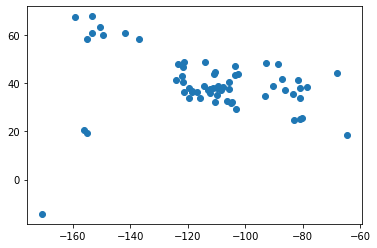

In [44]:
### Create a scatterplot to visualize park locations
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

Alaska, Hawaii and American Samoa parks are visible on the far left (11 total locations), and Virgin Islands park is in the bottom right (we'll drop this location too)

### Drop Parks Outside Continental US and Re-run TSP

In [91]:
df2 = df.query('Longitude > -130 and Latitude > 20')

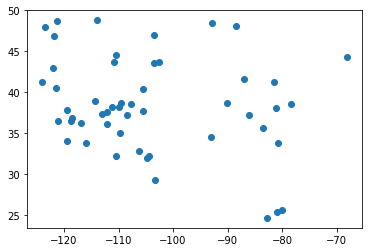

In [92]:
### Create new scatterplot to ensure records were removed
plt.scatter(x=df2['Longitude'], y=df2['Latitude'])
plt.show()

In [93]:
distances = great_circle_distance_matrix(df2[['Latitude','Longitude']]) / convert_m_to_mi
permutation, distance = solve_tsp_simulated_annealing(distances)

permutation2 = []
for i in permutation:
    permutation2.append(df2.iloc[i][0].replace(u'\xa0', u''))

In [94]:
print("The optimal path is:")
for index, value in enumerate(permutation2):
    print("Park number " + str(index) + ":     " + value)

The optimal path is:
Park number 0:     Acadia
Park number 1:     Cuyahoga Valley
Park number 2:     Mammoth Cave
Park number 3:     Gateway Arch
Park number 4:     Indiana Dunes
Park number 5:     Isle Royale
Park number 6:     Voyageurs
Park number 7:     Theodore Roosevelt
Park number 8:     Badlands
Park number 9:     Wind Cave
Park number 10:     Rocky Mountain
Park number 11:     Grand Teton
Park number 12:     Yellowstone
Park number 13:     Glacier
Park number 14:     North Cascades
Park number 15:     Olympic
Park number 16:     Mount Rainier
Park number 17:     Crater Lake
Park number 18:     Redwood
Park number 19:     Lassen Volcanic
Park number 20:     Yosemite
Park number 21:     Kings Canyon
Park number 22:     Sequoia
Park number 23:     Pinnacles
Park number 24:     Channel Islands
Park number 25:     Joshua Tree
Park number 26:     Death Valley
Park number 27:     Great Basin
Park number 28:     Zion
Park number 29:     Grand Canyon
Park number 30:     Bryce Canyon
Pa

In [95]:
print("Total distance covered for the optimal path was " + str("{:,.0f}".format(round(distance))) + " miles.")

Total distance covered for the optimal path was 11,881 miles.


### Conclusion

The total distance needed to visit the continental US parks came out to be only 11,881 miles compared to 26,555 miles when we were including the Alaskan + island locations. Since a key assumption of our route optimization is for the starting and ending points to be the same, we can choose to start our roadtrip from any of the 50 parks. In the case of my in-laws, they would likely begin with Wind Cave (Park #9 in our list) before moving onto Grand Teton, Yellowstone, and all the way thru the list ending with the Badlands.
&nbsp;

I hope you enjoyed this month's problem! Look for another problem to be solved in mid-to-late August. 
&nbsp;

Until next time,

&nbsp;
Ben